In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from pangolin import *
from pangolin.automap import automap, roll
import time

In [8]:
# create large regression model

dims = 100
ndata = 1000

x = makerv(np.random.randn(ndata,dims))
sigma = Truncated(normal_scale,lo=0)(0,1)
t0 = time.time()
w = automap([normal(0,1) for d in range(dims)])
t1 = time.time()
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)])
t2 = time.time()
print("times",t1-t0,t2-t1)
print_upstream(y)

times 0.0054891109466552734 0.6607918739318848
shape       | statement
----------- | ---------
()          | a = 0
()          | b = 1
(100,)      | c ~ vmap(normal_scale,[∅, ∅],100)(a,b)
(1000, 100) | d = [[ 0.125 0.401 0.158 ... 0.537 1.516 -1.614] [-1.313 0.936 -0.009 ... -0.963 -0.978 0.405] [-1.06  0.067 2.64 ... -1.968 1.303 -0.092] ... [-1.359 0.229 0.013 ... 0.844 -0.228 0.199] [-0.723 -1.422 -0.424 ... -1.669 0.036 0.64 ] [ 0.407 0.58 -1.465 ... -2.364 -1.259 1.6 ]]
(1000,)     | e = vmap(matmul,[∅, 0],1000)(c,d)
()          | f ~ truncated(normal_scale)(a,b)
(1000,)     | g ~ vmap(normal_scale,[0, ∅],1000)(e,f)


In [4]:
# def f(dims,ndata):
#     x = makerv(np.random.randn(ndata,dims))
#     sigma = Truncated(normal_scale,lo=0)(0,1)
#     w = automap([normal(0,1) for d in range(dims)])
#     y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)])
#     return y
#
# %timeit f(100,100)
# %timeit f(100,1000)
# %timeit f(100,10000)
# %timeit f(1000,10000)
#
# t1 = time.time()
# f(1000,10000)
# t2 = time.time()
# print(t2-t1)

In [9]:
dims = 100
ndata = 1000

t1 = time.time()
x = makerv(np.random.randn(ndata,dims))
sigma = abs(normal_scale(0,1))
w = automap([normal(0,1) for d in range(dims)],True)
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)],True)
y_obs = np.random.randn(*y.shape)
t2 = time.time()

print("reroll time:", t2-t1)

print_upstream(y)

t1 = time.time()
samps = calc.sample((sigma,w),y,y_obs)
t2 = time.time()

print("inference time:", t2-t1)


reroll time: 1.0532259941101074
shape       | statement
----------- | ---------
()          | a = 0
()          | b = 1
(100,)      | c ~ vmap(normal_scale,[∅, ∅],100)(a,b)
(1000, 100) | d = [[ 0.776 -1.776 0.105 ... 2.17  1.637 1.521] [-0.675 1.798 1.309 ... 1.266 1.348 -0.421] [ 1.013 -0.326 0.68 ... 1.781 -0.684 -0.249] ... [-1.011 0.348 0.92 ... -1.383 0.691 -1.377] [-0.225 -0.269 -1.54 ... -1.769 2.376 -0.613] [-0.496 0.028 -0.013 ... -0.218 -1.19  0.73 ]]
(1000,)     | e = vmap(matmul,[∅, 0],1000)(c,d)
()          | f ~ normal_scale(a,b)
()          | g = abs(f)
(1000,)     | h ~ vmap(normal_scale,[0, ∅],1000)(e,g)
inference time: 99.30142283439636


In [6]:
sigma

RV(abs, parents=[RV(normal_scale, parents=[RV(Constant(0)),RV(Constant(1))])])

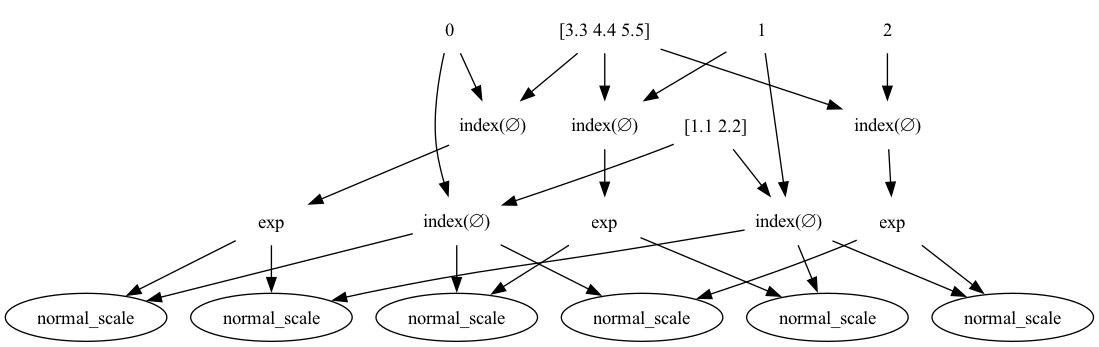

In [7]:
l = makerv([1.1,2.2])
s = makerv([3.3,4.4,5.5])
x = [[normal(l[i],exp(s[j])) for j in range(3)] for i in range(2)]
viz_upstream(x)

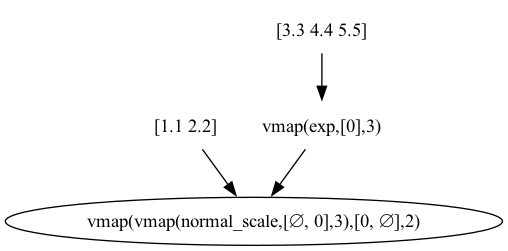

In [8]:
viz_upstream(automap(x))

In [9]:
x = makerv([1,2,3])
y = automap([x[0] for i in range(3)])

samp=Array([0, 0, 0], dtype=int32)
val.cond_dist.value=array([0, 1, 2])


In [10]:
# create large regression model

dims = 1000
ndata = 10000

x = makerv(np.random.randn(ndata,dims))
sigma = Truncated(normal_scale,lo=0)(0,1)
t0 = time.time()
w = automap([normal(0,1) for d in range(dims)],False)
t1 = time.time()
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)],False)
t2 = time.time()
print("times",t1-t0,t2-t1)
#print_upstream(y)

times 0.06501984596252441 1.5747020244598389


In [11]:
x = makerv(np.random.randn(ndata,dims))
sigma = Truncated(normal_scale,lo=0)(0,1)
t0 = time.time()
w = automap([normal(0,1) for d in range(dims)])
t1 = time.time()
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)])
t2 = time.time()
print("times",t1-t0,t2-t1)
print_upstream(y)

times 0.05702567100524902 1.4125711917877197
shape         | statement
------------- | ---------
()            | a = 0
()            | b = 1
(1000,)       | c ~ vmap(normal_scale,[∅, ∅],1000)(a,b)
(10000, 1000) | d = [[-0.072 -0.875 -0.855 ... 0.295 0.453 -0.025] [-0.114 0.621 -0.897 ... -1.127 0.658 0.248] [ 0.721 -0.927 -0.536 ... -0.211 1.437 -0.118] ... [ 0.133 0.734 0.104 ... 1.246 1.284 -0.618] [ 0.613 0.409 2.305 ... 0.025 0.598 -1.131] [-0.257 0.175 1.683 ... 1.699 0.459 -1.013]]
(10000,)      | e = vmap(matmul,[∅, 0],10000)(c,d)
()            | f ~ truncated(normal_scale)(a,b)
(10000,)      | g ~ vmap(normal_scale,[0, ∅],10000)(e,f)


In [12]:
y.parents[0]

RV(VMapDist(matmul, (None, 0), 10000), parents=[RV(VMapDist(normal_scale, (None, None), 1000), parents=[RV(Constant(0)),RV(Constant(1))]),RV(Constant([[-0.07201626,-0.87488941,-0.85508484,...,0.29502218,0.45328793,-0.02526605],[-0.11432698,0.62052209,-0.89675279,...,-1.1272675,0.65761954,0.24755279],[0.7205758,-0.92655004,-0.53634889,...,-0.21093019,1.43687346,-0.11807119],...,[0.1334922,0.73367903,0.10395258,...,1.24598504,1.28407426,-0.61804565],[0.61342699,0.40884313,2.30548419,...,0.0253925,0.59807054,-1.1309432],[-0.25737999,0.17515408,1.68270766,...,1.69873389,0.45879929,-1.01254926]]))])

In [13]:
y.parents[0].parents[0]

RV(VMapDist(normal_scale, (None, None), 1000), parents=[RV(Constant(0)),RV(Constant(1))])

In [14]:
y.parents[0].parents[0].parents

(RV(Constant(0)), RV(Constant(1)))

In [15]:
x = [Truncated(normal_scale,lo=0)(0,1) for i in range(3)]
y = automap([normal(xi,1) for xi in x])
print_upstream(y)

shape | statement
----- | ---------
()    | a = 0
()    | b = 1
(3,)  | c ~ vmap(truncated(normal_scale),[∅, ∅],3)(a,b)
(3,)  | d ~ vmap(normal_scale,[0, ∅],3)(c,b)


In [16]:
diag_normal = vmap(normal_scale)
x = automap([diag_normal(np.zeros(2),np.ones(2)) for i in range(3)])
print_upstream(x)

shape  | statement
------ | ---------
(2,)   | a = [0. 0.]
(2,)   | b = [1. 1.]
(3, 2) | c ~ vmap(vmap(normal_scale,[0, 0],2),[∅, ∅],3)(a,b)


In [17]:
from pangolin.arrays import ArrayND
x = ArrayND((5,))
for i in range(5):
    x[i] = automap([diag_normal(np.zeros(3),np.ones(3)) for i in range(4)])
print_upstream(x)

ACTIVATING
self.rvs=array([RV(VMapDist(VMapDist(normal_scale, (0, 0), 3), (None, None), 4), parents=[RV(Constant([0.,0.,0.])),RV(Constant([1.,1.,1.]))]),
       RV(VMapDist(VMapDist(normal_scale, (0, 0), 3), (None, None), 4), parents=[RV(Constant([0.,0.,0.])),RV(Constant([1.,1.,1.]))]),
       RV(VMapDist(VMapDist(normal_scale, (0, 0), 3), (None, None), 4), parents=[RV(Constant([0.,0.,0.])),RV(Constant([1.,1.,1.]))]),
       RV(VMapDist(VMapDist(normal_scale, (0, 0), 3), (None, None), 4), parents=[RV(Constant([0.,0.,0.])),RV(Constant([1.,1.,1.]))]),
       RV(VMapDist(VMapDist(normal_scale, (0, 0), 3), (None, None), 4), parents=[RV(Constant([0.,0.,0.])),RV(Constant([1.,1.,1.]))])],
      dtype=object)
shape     | statement
--------- | ---------
(3,)      | a = [0. 0. 0.]
(3,)      | b = [1. 1. 1.]
(5, 4, 3) | c ~ vmap(vmap(vmap(normal_scale,[0, 0],3),[∅, ∅],4),[∅, ∅],5)(a,b)


/var/folders/5z/ngs4vf717m12n9fd_sfbyyyw0000gn/T/ipykernel_37586/189002500.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  x = ArrayND((5,))
